In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os

In [3]:
# !wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000102/data/train.tar.gz

In [4]:
# !wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000102/data/code.tar.gz

In [5]:
data_train_path = './input/data/train'

image_path = os.path.join(data_train_path, 'images')

df_train = pd.read_csv(os.path.join(data_train_path, 'train.csv'))
df_train.sample(10)

,id,gender,race,age,path
1886,004389,female,Asian,36,004389_female_Asian_36
260,000665,female,Asian,54,000665_female_Asian_54
2512,006496,female,Asian,18,006496_female_Asian_18
361,000812,male,Asian,55,000812_male_Asian_55
1136,003081,female,Asian,20,003081_female_Asian_20
406,001029,male,Asian,59,001029_male_Asian_59
488,001116,female,Asian,25,001116_female_Asian_25
1535,003652,male,Asian,56,003652_male_Asian_56
567,001197,male,Asian,25,001197_male_Asian_25
1864,004355,female,Asian,51,004355_female_Asian_51


In [6]:
df_train.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [8]:
df_train.describe(include='all')

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,006522_female_Asian_19
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


In [9]:
group = df_train.groupby('gender')['age'].value_counts().sort_index()
display(group)
print(df_train['gender'].value_counts())

gender  age
female  18     151
        19     200
        20     187
        21      14
        22      21
              ... 
male    56      47
        57      37
        58      50
        59      46
        60      83
Name: age, Length: 84, dtype: int64

female    1658
male      1042
Name: gender, dtype: int64


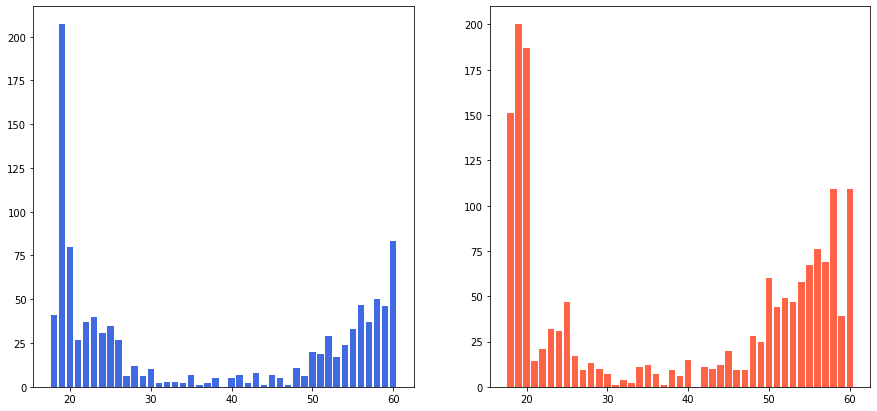

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

In [11]:
print('number of age < 30 \t: ', (np.where(df_train['age'] < 30)[0]).shape[0])
print('number of age >= 60 \t: ', (np.where(df_train['age'] >= 60)[0]).shape[0])
print('total number \t\t: ', len(df_train['age']))
print('proportion of age < 30  : ', (np.where(df_train['age'] < 30)[0]).shape[0] / len(df_train['age']))
print('proportion of age >= 60 : ', (np.where(df_train['age'] >= 60)[0]).shape[0] / len(df_train['age']))

number of age < 30 	:  1281
number of age >= 60 	:  192
total number 		:  2700
proportion of age < 30  :  0.47444444444444445
proportion of age >= 60 :  0.07111111111111111


In [12]:
# 47% of people are age under 30 
# 7% of people are age 60 (not over)
## Note that they would hardly be differentiated with age around 50~60 !!!!

In [13]:
score_mean = df_train.groupby('gender').mean().T
score_std = df_train.groupby('gender').std().T
score_mean, score_std

(gender     female       male
 age     38.528347  36.403071,
 gender     female       male
 age     16.888379  17.066934)

In [15]:
import glob

In [18]:
img_paths = glob.glob(image_path+'/00*')

In [19]:
img_paths[0]

'./input/data/train/images/003786_female_Asian_45'

In [32]:
imgs = glob.glob(img_paths[4] + '/*')
imgs

['./input/data/train/images/003287_female_Asian_19/mask2.jpg',
 './input/data/train/images/003287_female_Asian_19/incorrect_mask.jpg',
 './input/data/train/images/003287_female_Asian_19/normal.jpg',
 './input/data/train/images/003287_female_Asian_19/mask4.jpg',
 './input/data/train/images/003287_female_Asian_19/mask5.jpg',
 './input/data/train/images/003287_female_Asian_19/mask1.jpg',
 './input/data/train/images/003287_female_Asian_19/mask3.jpg']

In [33]:
os.listdir(img_paths[0])

['mask2.jpg',
 '._normal.jpg',
 '._mask3.jpg',
 '._mask1.jpg',
 'incorrect_mask.jpg',
 '._mask5.jpg',
 'normal.jpg',
 'mask4.jpg',
 '._mask2.jpg',
 'mask5.jpg',
 '._incorrect_mask.jpg',
 '._mask4.jpg',
 'mask1.jpg',
 'mask3.jpg']

In [27]:
from PIL import Image
img = Image.open(imgs[0])
imgArray = np.array(img)
print(imgArray.shape)

(512, 384, 3)


In [24]:
import torch 
from torchvision import datasets, transforms 
from torch.utils.data.dataset import Dataset 
from tqdm.notebook import tqdm 
from time import time

In [ ]:
N_CHANNELS = 3

before = time() 

mean = torch.zeros(1) 
std = torch.zeros(1) 

print('==> Computing mean and std..') 

for inputs, _labels in tqdm(full_loader): 
    for i in range(N_CHANNELS): 
        mean[i] += inputs[:,i,:,:].mean() 
        std[i] += inputs[:,i,:,:].std() 
        mean.div_(len(dataset)) 
        std.div_(len(dataset)) 
        
print(mean, std) 
print("time elapsed: ", time()-before)

# 출처: https://eehoeskrap.tistory.com/463 [Enough is not enough]